<a href="https://colab.research.google.com/github/fathanazka354/SKLearn-KMeans/blob/main/SKLearn_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# changing file to dataframe
df = pd.read_csv('./sample_data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
# rename columns name
df = df.rename(columns={'Gender':'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

In [26]:
# replace categoric data into numerik data
df['gender'].replace(['Female','Male'], [0, 1], inplace=True)

In [27]:
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [28]:
from sklearn.cluster import KMeans

# dropping customers column id and gender
X = df.drop(['CustomerID', 'gender'], axis=1)

# making list that filled is inertia
listCluster = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  listCluster.append(km.inertia_)

Text(0, 0.5, 'Inertia')

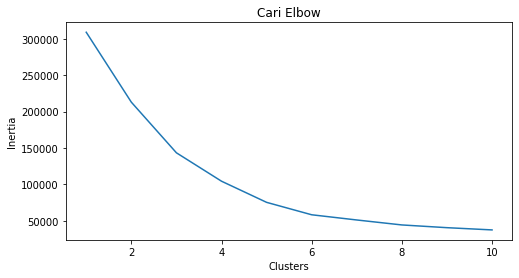

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=listCluster, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

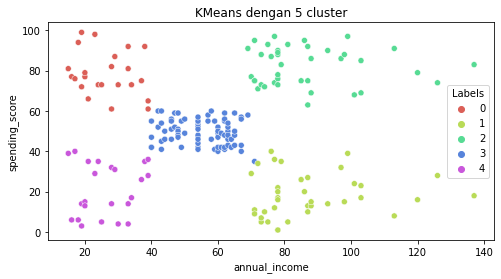

In [31]:
# making KMeans Object
km5 = KMeans(n_clusters=5).fit(X)

# adding label column
X['Labels'] = km5.labels_

# making KMeans plot using 5 cluster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
               palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 5 cluster')
plt.show()